0.7310585786300049
1.0
0.5000000025
1.0


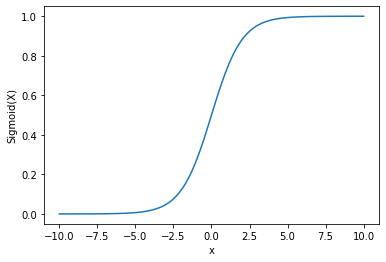

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


print(sigmoid(1))
print(sigmoid(99999))
print(sigmoid(0.00000001))
print(sigmoid(5184))

x = np.linspace(-10, 10, 100)
z = list(map(lambda x: sigmoid(x), x))

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")

plt.show()

### Decision boundary

Linear Regression can be used for classification problems
if h0(x) >= 0.5, predict 'yes'
if h0(x) < 0.5, predict 'no'
However, this method doesn't work well because classification is not actually a linear function.

Linear Decision Boundary
<br>

<img src="../img/log_reg/lenear_decision_boundry.png" width="500"/>

Theta parameters "θ1, θ2, θ3" should be selected for the better result of decision boundary line.

Non-linear Decision Boundary

### Making predictions
Using our knowledge of sigmoid functions and decision boundaries, we can now write a prediction function.

### The loss function (also known as a cost function)
We can’t (or at least shouldn’t) use the same cost function MSE (L2) as we did for linear regression.
Instead of Mean Squared Error, we use a cost function called ***Cross-Entropy*** also known as ***Log Loss.***
Cross-entropy loss can be divided into two separate cost functions: one for y=1 and one for y=0.


<br>
<img src="../img/log_reg/cost_fun_2_log_reg.png" width="500"/>

overfitting_problems.png
<br>
<img src="../img/log_reg/cost_fun_3_log_reg.png" width="500"/>
<br>
<img src="../img/log_reg/log_reg_cost_fun.png" width="500"/>

Above functions compressed into one. The main aim is minimization 'J' of theta.
<img src="../img/log_reg/fun_compressed_into_one.png" width="500"/>
<br>
Vectorized cost function
<img src="../img/log_reg/vectorized_cost_function.png" width="500"/>


In [2]:
def predict(features, weights):
    '''
    Returns 1D array of probabilities
    that the class label == 1
    '''
    z = np.dot(features, weights)
    return sigmoid(z)


def cost_function(features, labels, weights):
    '''
    Using Mean Absolute Error

    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels * np.log(predictions)

    #Take the error when label=0
    class2_cost = (1 - labels) * np.log(1 - predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

#### Gradient descent
Optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.

Which leads to an equally beautiful and convenient cost function derivative:

C'=x(s(z)-y)

1. C' is the derivative of cost with respect to weights
2. y is the actual class label (0 or 1)
3. s(z) is your model’s prediction
4. x is your feature or feature vector.


##### Pseudocode
Repeat {
  1. Calculate gradient average
  2. Multiply by learning rate
  3. Subtract from weights
}

<br>
<img src="../img/log_reg/vectorized_cost_details.png" width="500"/>

In [3]:
def predict(features, weights):
    '''
    Returns 1D array of probabilities
    that the class label == 1
    '''
    z = np.dot(features, weights)
    return sigmoid(z)


def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T, predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

### Put all parts together, provide example
To perform a prediction, you use neural network-like notation; you have weights (w), inputs (x) and bias (b)


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import copy
import numpy as np


#lr = CustomLogisticRegression()
#lr.fit(x_train, y_train, epochs=150)

# 0. You start by doing the weight and sigmoid calculation.
# 1. Multiply the inputs with the weights and add the bias.
# 2. Input these weights into the sigmoid function and get predictions.
# 3. Compute the loss by the implemented compute_loss function and the derivative by the compute_gradients function
# 4. The loss is not used in the model (only the derivative of the loss is used). but you can monitor the loss to determine when your model cannot learn more, which is how the 150 epochs were chosen for the model.
# 5.  Finally, you update the parameters of the model, and then you start the next iteration and continue iterating until you reach 150 iterations.

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


def compute_loss(y_true, y_pred):
    """
     The loss function (also known as a cost function) is implemented as a vectorized solution exactly like you saw in the explanation section into the formula.
     Finding all of the errors by comparing your ground truth y_true to your predictions y_pred
    :param y_true:
    :param y_pred:
    :return:
    """
    # binary cross entropy
    y_zero_loss = y_true * np.log(y_pred + 1e-9)
    y_one_loss = (1 - y_true) * np.log(1 - y_pred + 1e-9)
    return -np.mean(y_zero_loss + y_one_loss)


def compute_gradients(x, y_true, y_pred):
    """
    You start by finding the difference (how much your model predicted wrong)
    and use it to calculate the gradients for the bias by finding the average error.
    calculate the gradients, which are what you use to update the model parameters.
    :param x:
    :param y_true:
    :param y_pred:
    :return:
    """

    #  Start by finding the difference (how much your model predicted wrong)
    difference = y_pred - y_true
    #  calculate the gradients for the bias by finding the average error.
    gradient_bias = np.mean(difference)
    #  multiply the difference by the inputs (x).
    #  https://numpy.org/doc/stable/reference/generated/numpy.transpose.html
    gradients_w = np.matmul(x.transpose(), difference)
    #  find the average of each gradient. Row of the matrix
    gradients_w_mean = np.array([np.mean(grad) for grad in gradients_w])

    return gradients_w_mean, gradient_bias


def update_model_parameters(weights, bias, error_w, error_b):
    weights = weights - 0.1 * error_w
    bias = bias - 0.1 * error_b
    return weights, bias


def fit(x, y, epochs):
    x = copy.deepcopy(x).values
    y = copy.deepcopy(y).values

    weights = np.zeros(x.shape[1])
    bias = 0
    losses = []
    train_accuracies = []

    for i in range(epochs):
        #  Matrix product of two arrays.
        x_dot_weights = np.matmul(weights, x.transpose()) + bias
        pred = sigmoid(x_dot_weights)
        loss = compute_loss(y, pred)
        error_w, error_b = compute_gradients(x, y, pred)
        weights, bias = update_model_parameters(weights, bias, error_w, error_b)

        pred_to_class = [1 if p > 0.5 else 0 for p in pred]
        train_accuracies.append(accuracy_score(y, pred_to_class))
        losses.append(loss)

    return weights, bias


def predict(weights, bias, x):
    x_dot_weights = np.matmul(x, weights.transpose()) + bias
    probabilities = sigmoid(x_dot_weights)
    return [1 if p > 0.5 else 0 for p in probabilities]


if __name__ == '__main__':
    x = pd.read_csv("../data/breast_cancer_x_data.csv")
    y = pd.read_csv("../data/breast_cancer_y_target_data.csv")

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    weights, bias = fit(x_train, y_train, 150)
    pred = predict(weights, bias, x_test)
    accuracy = accuracy_score(y_test, pred)
    print(accuracy)

<ipython-input-5-8e7be5f2f1bd>:19: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-x))


0.9298245614035088


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Multiclass Classification problem:
Email -> Hobby, Friends, Work, Family
Medical -> not ill, cold, flue

Now we will approach the classification of data when we have more than two categories. Instead of y = {0,1} we will expand our definition so that y = {0,1...n}
Applying binary logistic regression to each case '{0,1...n}', and then use the hypothesis that returned the highest value as our prediction.
<br>
<img src="../img/log_reg/multiclass_classification.png" width="500"/>